In [1]:
import os
import pickle

import pandas as pd
import datetime as dt
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

from keras.models import load_model
import tweepy
import json

os.chdir('C:\\Users\\kosta\\Desktop\\projects\\twitter\src')
from predict import predict
from decode_sentiment import decode_sentiment
import twitter_credentials
from fetch_tweets import fetch_tweets

os.chdir('C:\\Users\\kosta\\Desktop\\projects\\twitter\models')
tokenizer = pickle.load(open('tokenizer.pkl', "rb"))
model = load_model('model.h5')


Using TensorFlow backend.


In [63]:
pd.set_option('display.max_colwidth', -1)

In [3]:
auth = tweepy.OAuthHandler(twitter_credentials.consumer_key, twitter_credentials.consumer_secret)
auth.set_access_token(twitter_credentials.access_token, twitter_credentials.access_token_secret)
api = tweepy.API(auth)

In [4]:
screen_name = 'BCGDV'
df_tweets = fetch_tweets(screen_name,api)
df_tweets['Date'] = pd.to_datetime(df_tweets['Date'].dt.date)
df_tweets['free_text'] = df_tweets['free_text'].apply(row_text: row_text.decode("utf-8")) 

In [5]:
print('No. of tweets: {}'.format(df_tweets.shape[0]))

No. of tweets: 2363


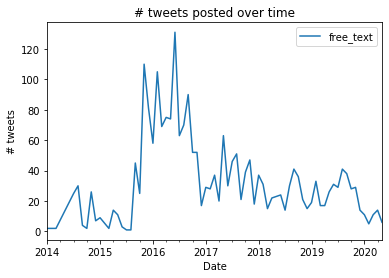

In [6]:
df_tweets.groupby(df_tweets['Date'].dt.to_period('M')).agg({'free_text':'count'}).reset_index().plot('Date','free_text')
plt.ylabel('# tweets')
plt.title('# tweets posted over time')
plt.show()

In [50]:
text = df_tweets.sample(n=1)['free_text'].values[0].decode("utf-8")
print(text,'\n')
predict(text=text,SEQUENCE_LENGTH=300,saved_tokenizer=tokenizer,saved_model=model)

RT @Jeffschumacher4: Speaking earlier pre-#slush15 about re-imaging and re-creating world-leading businesses with #digital ventures. https:… 



{'label': 'POSITIVE',
 'score': 0.8898628354072571,
 'elapsed_time': 0.02393627166748047}

In [55]:
df_tweets['polarity'] = df_tweets['free_text'].apply(lambda row_text: predict(row_text,SEQUENCE_LENGTH=300,saved_tokenizer=tokenizer,saved_model=model)['label'])

In [56]:
df_tweets.groupby('polarity').size()

polarity
NEGATIVE    147 
NEUTRAL     502 
POSITIVE    1714
dtype: int64

In [105]:
seed=52
df_tweets[df_tweets['polarity']=='NEGATIVE'].sample(n=5,random_state=seed)


,Date,free_text,polarity
1967,2015-12-28,A #Design Trend No One Could Have Predicted. The intersection of #raw materials and the #DIY aesthetic via @Inc https://t.co/MQfaILPDY8,NEGATIVE
930,2017-05-31,""" #Digital breaks down functional, regional and industrial barriers."" - @Jeffschumacher4 from #CodeConf w/ @Nasdaq… https://t.co/XF42FoWmCZ",NEGATIVE
478,2018-09-05,RT @TOABerlin: 90% of startups fail. Want to be different? Want to actually succeed? \nFounder of @BCGDV explains what makes VCs tick: 13 ke…,NEGATIVE
1036,2017-03-12,My body is not an iPhone - Principle 1 for #designing #wearables. All 6 are available for download now on Pollen:… https://t.co/KDywZj7CLo,NEGATIVE
897,2017-07-01,"RT @designtaxi: There is no good or bad font, just bad uses of fonts https://t.co/DKRImcw1Pg",NEGATIVE


In [103]:
df_tweets[df_tweets['polarity']=='NEUTRAL'].sample(n=5,random_state=seed)

,Date,free_text,polarity
332,2019-02-22,Go time! #DVImagines #BCGDV,NEUTRAL
1740,2016-03-28,Blending the mindsets of an entrepreneur and an employee in the workplace. https://t.co/6WlrzzcV3h,NEUTRAL
1757,2016-03-23,RT @arstechnica: Having a hard time parsing all the upcoming VR offerings? We've got you covered #flowchart https://t.co/y05otSQJYp https:/…,NEUTRAL
395,2018-11-08,"“All modes of mobility are made up of a vehicle, a path and an experience.” Food for thought from Dylan Jones of Ge… https://t.co/t6xPPU1JN7",NEUTRAL
418,2018-10-18,Test &amp; learn always. https://t.co/FDbYXyyf6a @rderow #growth #growthmarketing https://t.co/agVsDYSZzL,NEUTRAL


In [104]:
df_tweets[df_tweets['polarity']=='POSITIVE'].sample(n=5,random_state=seed)

,Date,free_text,polarity
1858,2016-02-11,BCGDV #Sydney Director @CraigBoshier speaks at @PauseFest at @FutureBrand &amp; BCGDV Business Day https://t.co/1K3QDSxM5b,POSITIVE
1791,2016-03-07,Read our reflections from our recent stint of mentoring at @mymgsm from DV Asia's @sangelalloyd https://t.co/SjOOmc9BNm,POSITIVE
676,2018-01-03,"RT @aigalosangeles: Today, analysts &amp; algorithms can predict your next decision before you’re even faced with it. How does design fit into…",POSITIVE
476,2018-09-05,“We are all listening to data all the time. Consuming it every day” - Micah from Allergan on conversational commerc… https://t.co/GAm1pqQxqc,POSITIVE
1807,2016-02-27,Question time-thanks for the talk Madeleine on #research jammers now have some great input for #GSJam @Jam_Berlin https://t.co/MLk7CxF99q,POSITIVE
